In [69]:
import os
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Convolution2D,Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from keras import optimizers
from keras.models import Model,load_model
from sklearn.metrics import plot_confusion_matrix

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [42]:
root_path = '/content/drive/My Drive/Smart Health/Assignment3/DS/'
files = os.listdir(root_path)
X = []
Y = []
for f in files:
  tmp_class_num = None
  if f[0] == 'A':
    tmp_class_num = 0
  elif f[0] == 'C':
    tmp_class_num = 1
  elif f[0] == 'H':
    tmp_class_num = 2
  
  file_path = root_path + f
  img_arr = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
  resized_arr = cv2.resize(img_arr, (32, 32))
  X.append(resized_arr)
  Y.append(tmp_class_num)


print(type(X), len(X), len(X[0]), len(X[1]))

<class 'list'> 1510 32 32


In [43]:
X = np.array(X)
Y = np.array(Y)

print(X.shape,"   ",Y.shape)

(1510, 32, 32)     (1510,)


In [44]:

X = X / 255


X.shape

(1510, 32, 32)

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=54)

In [46]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [47]:

label_a = 0
label_b = 0
label_c = 0
for i in Y_train:
  if i==0:
    label_a = label_a +1
  
  if i==1:
    label_b = label_b +1
  
  if i==2:
    label_c = label_c +1

print(label_a,"   ",label_b,"  ",label_c)

348     367    342


Text(0.5, 1.0, '1')

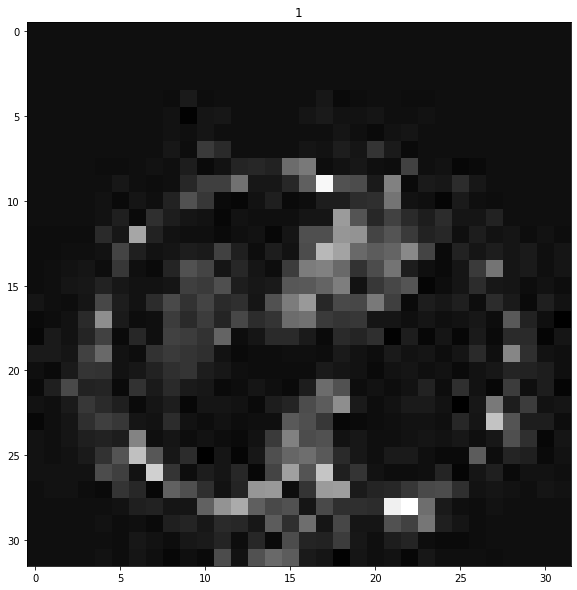

In [48]:
plt.figure(figsize = (10, 10))
plt.imshow(X[0], cmap='gray')
plt.title(Y[0])

In [49]:
activationFunction = 'relu'
def getModel():
    model = Sequential()
    
    model.add(Conv2D(64, kernel_size = (5, 5), activation=activationFunction, input_shape=(32, 32, 1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # model.add(Dropout(0.1))

    model.add(Conv2D(32, kernel_size=(3,3), activation=activationFunction))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # model.add(Dropout(0.1))
    
    model.add(Conv2D(16, kernel_size=(3,3), activation=activationFunction))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # model.add(Dropout(0.1))
    
    model.add(Flatten())
    model.add(Dense(100, activation=activationFunction, name ='feature_dense'))
    model.add(Dense(3, activation = 'softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

model = getModel()

In [50]:
def show_results(test, pred):
    target = ['A', 'C', 'H']
    print(classification_report(test, pred, target_names=target))
    accuracy = accuracy_score(test, pred)
    precision=precision_score(test, pred, average='weighted')
    f1Score=f1_score(test, pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    confusion_mat=confusion_matrix(test, pred)
    print(confusion_mat)
    return {'accuracy':accuracy, 'precision':precision, 'f1Score':f1Score}

In [51]:
X_train = np.expand_dims(X_train, axis = 3)
X_test = np.expand_dims(X_test, axis = 3)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1057, 32, 32, 1) (453, 32, 32, 1) (1057,) (453,)


In [52]:
datagen.fit(X_train)

In [53]:
model.fit(datagen.flow(X_train, Y_train, batch_size=32), 
                    epochs=10)

# model.save('/content/drive/My Drive/Smart Health/Assignment3/1106924.h5')

Epoch 1/10
34/34 [==============================] - 0s 9ms/step - loss: 0.3553 - accuracy: 0.9290
Epoch 2/10
34/34 [==============================] - 0s 9ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 3/10
34/34 [==============================] - 0s 9ms/step - loss: 0.0067 - accuracy: 0.9981
Epoch 4/10
34/34 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 5/10
34/34 [==============================] - 0s 9ms/step - loss: 2.1450e-04 - accuracy: 1.0000
Epoch 6/10
34/34 [==============================] - 0s 9ms/step - loss: 1.6819e-04 - accuracy: 1.0000
Epoch 7/10
34/34 [==============================] - 0s 9ms/step - loss: 0.0086 - accuracy: 0.9962
Epoch 8/10
34/34 [==============================] - 0s 9ms/step - loss: 0.0056 - accuracy: 0.9981
Epoch 9/10
34/34 [==============================] - 0s 9ms/step - loss: 8.7875e-04 - accuracy: 1.0000
Epoch 10/10
34/34 [==============================] - 0s 9ms/step - loss: 1.7008e-04 - accuracy: 1.0000


In [195]:
# model = load_model('/content/drive/My Drive/Smart Health/Assignment3/1106924.h5')

In [54]:
intermediate_layer_train = Model(inputs=model.input,
                                 outputs=model.get_layer('feature_dense').output)

intermediate_layer_train.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3_input (InputLayer)  [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 16)         

In [55]:
X_train_feat = intermediate_layer_train.predict(X_train)
X_test_feat = intermediate_layer_train.predict(X_test)

print(X_test_feat.shape,"   ",X_train_feat.shape)

(453, 100)     (1057, 100)


In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose=0)

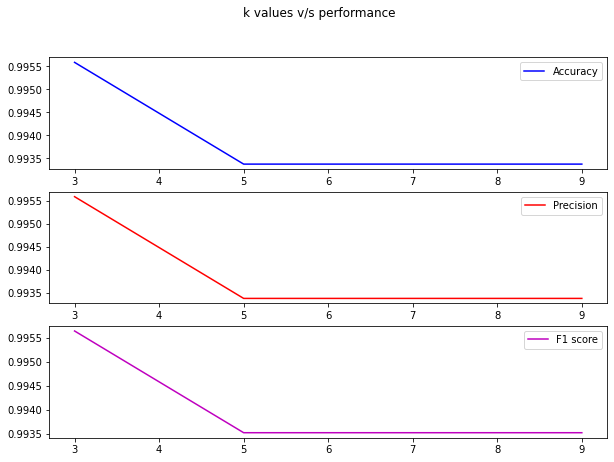

In [57]:
knn = KNeighborsClassifier()
k_range = [3, 5, 7, 9]
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

testing_acc = []
testing_f1 = []
testing_precision = []
for k in k_range:
  k_object = KNeighborsClassifier(n_neighbors=k)
  k_object.fit(X_train_feat, Y_train)
  y_pred = k_object.predict(X_test_feat)  
  accuracy = accuracy_score(Y_test, y_pred)
  precision = precision_score(Y_test, y_pred, average='weighted')
  f1Score = f1_score(Y_test, y_pred, average='weighted') 
  testing_acc.append(accuracy)
  testing_f1.append(f1Score)
  testing_precision.append(precision)

%matplotlib inline 
fig = plt.figure(figsize=(10,7))
fig.suptitle('k values v/s performance')

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.plot(k_range, testing_acc,'b',label='Accuracy')
ax2.plot(k_range, testing_f1,'r',label='Precision')
ax3.plot(k_range, testing_precision,'m',label='F1 score')

ax1.legend()
ax2.legend()
ax3.legend()

knn_obj = KNeighborsClassifier(n_neighbors=3)    
knn_obj.fit(X_train_feat, Y_train)

grid.fit(X_train_feat, Y_train)

In [58]:
grid.best_params_

{'n_neighbors': 3}

In [59]:
grid.cv_results_

{'mean_fit_time': array([0.00465837, 0.00448699, 0.00448413, 0.00458627]),
 'mean_score_time': array([0.01358299, 0.01346173, 0.01377573, 0.01411958]),
 'mean_test_score': array([0.99432174, 0.99432174, 0.99432174, 0.99337834]),
 'param_n_neighbors': masked_array(data=[3, 5, 7, 9],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9}],
 'rank_test_score': array([1, 1, 1, 4], dtype=int32),
 'split0_test_score': array([0.99528302, 0.99528302, 0.99528302, 0.99528302]),
 'split1_test_score': array([0.99528302, 0.99528302, 0.99528302, 0.99056604]),
 'split2_test_score': array([1., 1., 1., 1.]),
 'split3_test_score': array([0.99052133, 0.99052133, 0.99052133, 0.99052133]),
 'split4_test_score': array([0.99052133, 0.99052133, 0.99052133, 0.99052133]),
 'std_fit_time': array([3.78166127e-04, 6.57543399e-05, 5.28982864e-05, 2.56324940e-04]),
 'std_scor

In [60]:
import pickle
pkl_knn = "/content/drive/My Drive/Smart Health/Assignment3/1106924-kNN.pkl"
pkl_rf = "/content/drive/My Drive/Smart Health/Assignment3/1106924-RF.pkl"
with open(pkl_knn, 'wb') as file:
  pickle.dump(grid, file)

              precision    recall  f1-score   support

           A       1.00      0.99      0.99       152
           C       0.99      1.00      0.99       133
           H       1.00      1.00      1.00       168

    accuracy                           1.00       453
   macro avg       1.00      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453

Accuracy  : 0.9955849889624724
Precision : 0.9956503965333988
f1Score : 0.9955868436424081
[[150   2   0]
 [  0 133   0]
 [  0   0 168]]


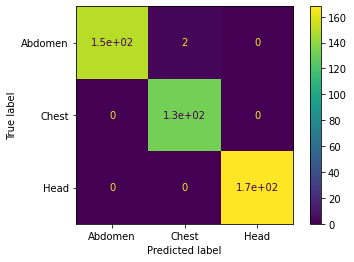

In [71]:
with open(pkl_knn, 'rb') as file:
  grid1 = pickle.load(file)
x = grid1.predict(X_test_feat)
results = show_results(Y_test, x)
labels = ['Abdomen', 'Chest', 'Head']
plot_confusion_matrix(grid1, X_test_feat, Y_test, display_labels = labels)  # doctest: +SKIP
plt.show()

In [62]:
rf_model = RandomForestClassifier()
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)],
               'max_depth': [int(x) for x in np.linspace(5, 25, num = 5)],
               'bootstrap': [True, False]
               }
rf_random = RandomizedSearchCV(estimator =rf_model, 
                               param_distributions = random_grid, 
                               n_iter = 25, cv = 5)

In [63]:
rf_random.fit(X_train_feat, Y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [64]:
rf_random.best_params_

{'bootstrap': False, 'max_depth': 20, 'n_estimators': 200}

In [65]:
with open(pkl_rf, 'wb') as file:
  pickle.dump(rf_random, file)

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       152
           C       1.00      1.00      1.00       133
           H       1.00      1.00      1.00       168

    accuracy                           1.00       453
   macro avg       1.00      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453

Accuracy  : 1.0
Precision : 1.0
f1Score : 1.0
[[152   0   0]
 [  0 133   0]
 [  0   0 168]]


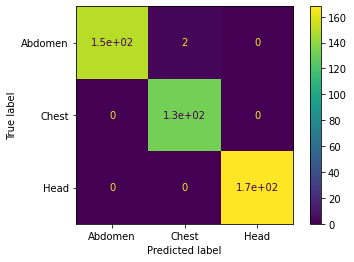

In [72]:
with open(pkl_rf, 'rb') as file:
  rf_random1 = pickle.load(file)

predictions = rf_random1.predict(X_test_feat)
show_results(Y_test, predictions)
labels = ['Abdomen', 'Chest', 'Head']
plot_confusion_matrix(grid1, X_test_feat, Y_test, display_labels = labels)  # doctest: +SKIP
plt.show()